# TALLER N. 3.
## Punto 1 -a:  Entrenamiento de un perceptrón multicapa.

<p>Integrantes:</p>
<ul>
<li>Juan Camilo Cática</li>
<li>Ricardo Santacruz </li>
<li>Diego Fernando Escobar</li>
</ul>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng

In [3]:
#Cargar Bd

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print("X_train_full Shape :", X_train_full.shape)
print("X_train_full[0] Shape :", X_train_full[0].shape)
print("y_train_full Shape :", y_train_full.shape)


print("X_test Shape       :", X_test.shape)
print("y_test Shape       :", y_test.shape)

X_train_full Shape : (60000, 28, 28)
X_train_full[0] Shape : (28, 28)
y_train_full Shape : (60000,)
X_test Shape       : (10000, 28, 28)
y_test Shape       : (10000,)


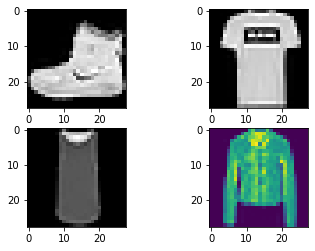

In [6]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train_full[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_full[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_full[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)

#Plot test - color
plt.imshow(X_test[10])
# show the plot
plt.show()

In [7]:
#Obtener set datos validacion

In [8]:
X_valid, X_train = X_train_full[:5000] , X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
#Nomalizar datos de validacion y entrenamiento

In [10]:
X_valid = normalize(X_valid)
X_train = normalize(X_train)

In [11]:
#Establecer el nombre de las clases

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

# Crear modelo.
## capa de entrada con input shape [28,28] .
#### FLATEN VECTORIZA LAS IMAGENES Y LAS VUELVE EN UN ARREGLO DE UNA DIMESION.
#### SE OBTIENE UN ARREGLO DE UAN DIMESION CON 28X28 =728 ELEMENTOS (CAPA DE ENTRADA).
## Se adicionan dos capas ocultas de 300 y 100 neuronas y activación relu.
## La capa de salida con 10 neuronas =Len(class_names) y activación multiclase softmax

In [13]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Flatten(input_shape=[28,28]))
modelo.add(keras.layers.Dense(300,activation ="relu"))
modelo.add(keras.layers.Dense(100,activation ="relu"))
modelo.add(keras.layers.Dense(10,activation ="softmax"))    
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Pesos incializados por capa
for lay in modelo.layers:
    print(lay.name)
    print(lay.get_weights())

flatten
[]
dense
[array([[-0.02166273, -0.03912928,  0.06135528, ..., -0.04562813,
         0.06831679, -0.00864974],
       [ 0.06271914,  0.01451854, -0.0002798 , ..., -0.06131898,
        -0.0256618 ,  0.06593293],
       [ 0.0198298 , -0.02213283,  0.03300832, ...,  0.02251069,
        -0.03165487, -0.0249953 ],
       ...,
       [ 0.0397812 ,  0.07111815, -0.01302123, ...,  0.06127705,
        -0.00275857,  0.04632638],
       [ 0.05639772, -0.01593735,  0.03715055, ...,  0.07390484,
         0.02822387, -0.01005985],
       [ 0.01245049, -0.04149776, -0.05539218, ..., -0.00173022,
        -0.01376851,  0.05805489]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [15]:
#Pesos  capa dense 
modelo.get_layer("dense").get_weights()

[array([[-0.02166273, -0.03912928,  0.06135528, ..., -0.04562813,
          0.06831679, -0.00864974],
        [ 0.06271914,  0.01451854, -0.0002798 , ..., -0.06131898,
         -0.0256618 ,  0.06593293],
        [ 0.0198298 , -0.02213283,  0.03300832, ...,  0.02251069,
         -0.03165487, -0.0249953 ],
        ...,
        [ 0.0397812 ,  0.07111815, -0.01302123, ...,  0.06127705,
         -0.00275857,  0.04632638],
        [ 0.05639772, -0.01593735,  0.03715055, ...,  0.07390484,
          0.02822387, -0.01005985],
        [ 0.01245049, -0.04149776, -0.05539218, ..., -0.00173022,
         -0.01376851,  0.05805489]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# Compilar el modeo
### Funcion de perdida: sparse_categorical_crossentropy para multiclase
### Optimizador: Stochastic gradient descent optimizer. sgd
### Metricas: accuracy

In [16]:
# se usa sparse_categorical_crossentropy por que es multicalse y y_train no es one hot encoding y es numerico
modelo.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

# Entrenamiento de Modelo
## 30 epocas 

In [17]:
history = modelo.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 158us/sample - loss: 1.1107 - accuracy: 0.6192 - val_loss: 0.8569 - val_accuracy: 0.7094
Epoch 2/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.7733 - accuracy: 0.7313 - val_loss: 0.7734 - val_accuracy: 0.7338
Epoch 3/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.6990 - accuracy: 0.7569 - val_loss: 0.6983 - val_accuracy: 0.7652
Epoch 4/30
55000/55000 [==============================] - 8s 154us/sample - loss: 0.6499 - accuracy: 0.7744 - val_loss: 0.6747 - val_accuracy: 0.7670
Epoch 5/30
55000/55000 [==============================] - 9s 155us/sample - loss: 0.6102 - accuracy: 0.7877 - val_loss: 0.6805 - val_accuracy: 0.7682
Epoch 6/30
55000/55000 [==============================] - 8s 154us/sample - loss: 0.5782 - accuracy: 0.7985 - val_loss: 0.6377 - val_accuracy: 0.7762
Epoch 7/30
55000/55000 [===========================

In [18]:
#Evaluacion
Xtest = normalize(X_test)
score = modelo.evaluate(Xtest, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5429640733718872
Test accuracy: 0.8223


In [19]:
#normalizado por divison 255.0

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
modelo1 = keras.models.Sequential()
modelo1.add(keras.layers.Flatten(input_shape=[28,28]))
modelo1.add(keras.layers.Dense(300,activation ="relu"))
modelo1.add(keras.layers.Dense(100,activation ="relu"))
modelo1.add(keras.layers.Dense(10,activation ="softmax"))    
#modelo1.summary()
modelo1.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])
history = modelo1.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 10s 187us/sample - loss: 0.7257 - accuracy: 0.7645 - val_loss: 0.5271 - val_accuracy: 0.8198
Epoch 2/30
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4931 - accuracy: 0.8281 - val_loss: 0.4409 - val_accuracy: 0.8514
Epoch 3/30
55000/55000 [==============================] - 10s 174us/sample - loss: 0.4492 - accuracy: 0.8432 - val_loss: 0.4204 - val_accuracy: 0.8558
Epoch 4/30
55000/55000 [==============================] - 9s 163us/sample - loss: 0.4210 - accuracy: 0.8537 - val_loss: 0.4199 - val_accuracy: 0.8516
Epoch 5/30
55000/55000 [==============================] - 8s 154us/sample - loss: 0.4009 - accuracy: 0.8604 - val_loss: 0.4071 - val_accuracy: 0.8586
Epoch 6/30
55000/55000 [==============================] - 9s 170us/sample - loss: 0.3845 - accuracy: 0.8656 - val_loss: 0.4475 - val_accuracy: 0.8404
Epoch 7/30
55000/55000 [=========================

In [39]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [20]:
Xtest = X_test / 255.0
score = modelo1.evaluate(Xtest, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33056598591804504
Test accuracy: 0.8838


In [21]:
# Se observa que el tipo  de normalización de datos afecta el desempeño del modelo. 


# Plot Curvas de aprendizaje entrenamiento y validación

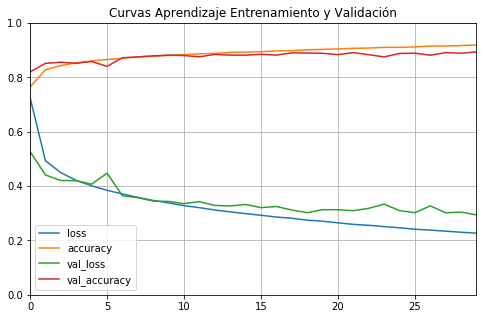

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("Curvas Aprendizaje Entrenamiento y Validación")
plt.show()

### Se observa que las curvas de entrenamiento y Validación en "Accuracy" son muy cercanas lo que indica una buena generalización del modelo,
### En cuanto a la perdida en entrenamiento y validación después de la época 17 la perdida de entrenamiento decrece más rápidamente que la de validación, sin embargo las perdida después de la época 30 continua decreciendo, lo que indica que se puede de aumentar el número de épocas


# Predicciones del Modelo

In [26]:
#predict muestra la probabilidad asignada a cad clase a una instnacia dada
X_new = X_test[:3]
y_proba = modelo1.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# con predict_classes determian cual es la clase con mayor ptobabilidad para un ainstacia
y_pred = modelo1.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [28]:
#Ver la clasifcacado adda a cada clse
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

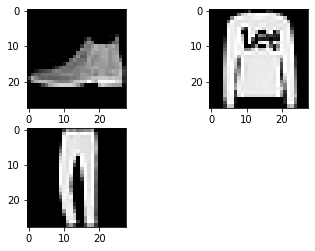

In [29]:
#Plot de la prediicon  declase
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_new[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_new[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_new[2], cmap=plt.get_cmap('gray'))


# En conclusión se observa un buen desempeño del modelo , prediciendo correctamente en 88% de las veces

# Mejores parámetros con gridsearch

In [34]:
def crear_modelo(optimizer='sgd', init='glorot_uniform'):
    modelo1 = keras.models.Sequential()
    modelo1.add(keras.layers.Flatten(input_shape=[28,28]))
    modelo1.add(keras.layers.Dense(300,kernel_initializer=init,activation ="relu"))
    modelo1.add(keras.layers.Dense(100,kernel_initializer=init, activation ="relu"))
    modelo1.add(keras.layers.Dense(10,kernel_initializer=init,activation ="softmax"))    
    #modelo.summary()
    modelo1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,  metrics=["accuracy"])
    return modelo1
    

In [35]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy
model = KerasClassifier(build_fn=crear_modelo, verbose=0)
optimizers = ['sgd','rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [20, 30, 50]
batches = [32, 50, 100]


param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train,validation_data=(X_valid, y_valid))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.894509 using {'batch_size': 32, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.875982 (0.003952) with: {'batch_size': 32, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'sgd'}
0.869527 (0.014901) with: {'batch_size': 32, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.887127 (0.007168) with: {'batch_size': 32, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.871127 (0.004723) with: {'batch_size': 32, 'epochs': 20, 'init': 'normal', 'optimizer': 'sgd'}
0.879491 (0.005289) with: {'batch_size': 32, 'epochs': 20, 'init': 'normal', 'optimizer': 'rmsprop'}
0.889055 (0.001299) with: {'batch_size': 32, 'epochs': 20, 'init': 'normal', 'optimizer': 'adam'}
0.867873 (0.003353) with: {'batch_size': 32, 'epochs': 20, 'init': 'uniform', 'optimizer': 'sgd'}
0.873364 (0.001537) with: {'batch_size': 32, 'epochs': 20, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.890473 (0.002818) with: {'batch_size': 32, 'epochs': 20, 'init': 'uniform', 'optimizer': 

## Se observa que los mejores parámeros con una Accuracy del 89%, para el modelo son: 
## Best: 0.894509 using {'batch_size': 32, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}

In [37]:

modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
modelo1.save('modelo3.h5')